In [3]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head(30)


,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,June 2022,07/22/2022
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,June 2022,07/22/2022
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,June 2022,07/22/2022


In [4]:
#Filter by English learners
ell_df = data_set_df.loc[(data_set_df["Student group"]=="English Learners")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
ell_df = ell_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_ell_df = pd.merge(all_df, ell_df, on="District name", how="right")

#Check counts
merged_ell_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y
0,Connecticut,All Students,500285,0.9169,English Learners,43571
1,Ansonia School District,All Students,2139,0.9045,English Learners,122
2,Avon School District,All Students,3057,0.9457,English Learners,76
3,Berlin School District,All Students,2613,0.9341,English Learners,95
4,Bethel School District,All Students,3102,0.9375,English Learners,167


In [5]:
#Calculate Percentages
merged_ell_df["Count Not ELL"]=merged_ell_df["2021-2022 student count - year to date_x"]-merged_ell_df["2021-2022 student count - year to date_y"]
merged_ell_df["Percentage ELL"]=merged_ell_df["2021-2022 student count - year to date_y"]/merged_ell_df['2021-2022 student count - year to date_x']
merged_ell_df["Percentage Not ELL"]=merged_ell_df["Count Not ELL"]/merged_ell_df['2021-2022 student count - year to date_x']
merged_ell_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Count Not ELL,Percentage ELL,Percentage Not ELL
0,Connecticut,All Students,500285,0.9169,English Learners,43571,456714,0.087092,0.912908
1,Ansonia School District,All Students,2139,0.9045,English Learners,122,2017,0.057036,0.942964
2,Avon School District,All Students,3057,0.9457,English Learners,76,2981,0.024861,0.975139
3,Berlin School District,All Students,2613,0.9341,English Learners,95,2518,0.036357,0.963643
4,Bethel School District,All Students,3102,0.9375,English Learners,167,2935,0.053836,0.946164


In [6]:
#Filter to just ELL Connecticut
con_ell_df = merged_ell_df.loc[merged_ell_df["District name"] == "Connecticut"]
con_ell_df

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Count Not ELL,Percentage ELL,Percentage Not ELL
0,Connecticut,All Students,500285,0.9169,English Learners,43571,456714,0.087092,0.912908


In [7]:
#Filter by Student with Disabilites
dis_df = data_set_df.loc[(data_set_df["Student group"]=="Students With Disabilities")]
all_df = data_set_df.loc[(data_set_df["Student group"]=="All Students")]


#Limit data frame again
dis_df = dis_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_df = all_df[["District name", "Student group", "2021-2022 student count - year to date", "2021-2022 attendance rate - year to date"]]

#Merge Data sets right
merged_dis_df = pd.merge(all_df, dis_df, on="District name", how="right")

#Check counts
merged_dis_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y
0,Connecticut,All Students,500285,0.9169,Students With Disabilities,78417
1,Andover School District,All Students,161,0.9386,Students With Disabilities,23
2,Ansonia School District,All Students,2139,0.9045,Students With Disabilities,369
3,Ashford School District,All Students,343,0.9309,Students With Disabilities,46
4,Avon School District,All Students,3057,0.9457,Students With Disabilities,324


In [8]:
#Calculate Percentages
merged_dis_df["Percentage Disabilities"]=merged_dis_df["2021-2022 student count - year to date_y"]/merged_dis_df['2021-2022 student count - year to date_x']
merged_dis_df["Count Not Disabilities"]=merged_dis_df["2021-2022 student count - year to date_x"]-merged_dis_df["2021-2022 student count - year to date_y"]
merged_dis_df["Percentage Not Disabilites"] = merged_dis_df["Count Not Disabilities"]/merged_dis_df["2021-2022 student count - year to date_x"]
merged_dis_df.head()

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Percentage Disabilities,Count Not Disabilities,Percentage Not Disabilites
0,Connecticut,All Students,500285,0.9169,Students With Disabilities,78417,0.156745,421868,0.843255
1,Andover School District,All Students,161,0.9386,Students With Disabilities,23,0.142857,138,0.857143
2,Ansonia School District,All Students,2139,0.9045,Students With Disabilities,369,0.172511,1770,0.827489
3,Ashford School District,All Students,343,0.9309,Students With Disabilities,46,0.134111,297,0.865889
4,Avon School District,All Students,3057,0.9457,Students With Disabilities,324,0.105986,2733,0.894014


In [9]:
con_dis_df = merged_dis_df.loc[merged_dis_df["District name"]=="Connecticut"]
con_dis_df

,District name,Student group_x,2021-2022 student count - year to date_x,2021-2022 attendance rate - year to date,Student group_y,2021-2022 student count - year to date_y,Percentage Disabilities,Count Not Disabilities,Percentage Not Disabilites
0,Connecticut,All Students,500285,0.9169,Students With Disabilities,78417,0.156745,421868,0.843255


In [15]:
#Merge ELL and Dis
merged_1_df = pd.merge(con_ell_df, con_dis_df, on="District name", how = "left")
del merged_1_df["Student group_x_y"]
del merged_1_df["2021-2022 student count - year to date_x_y"]
del merged_1_df["2021-2022 attendance rate - year to date_y"]
merged_1_df

,District name,Student group_x_x,2021-2022 student count - year to date_x_x,2021-2022 attendance rate - year to date_x,Student group_y_x,2021-2022 student count - year to date_y_x,Count Not ELL,Percentage ELL,Percentage Not ELL,Student group_y_y,2021-2022 student count - year to date_y_y,Percentage Disabilities,Count Not Disabilities,Percentage Not Disabilites
0,Connecticut,All Students,500285,0.9169,English Learners,43571,456714,0.087092,0.912908,Students With Disabilities,78417,0.156745,421868,0.843255


In [28]:
percent_yes = [merged_1_df["Percentage ELL"]]
percent_no = [merged_1_df["Percentage Not ELL"]]
index = ["English Learners", "Students with Disabilities"]
bar_graph_df=pd.DataFrame({"Percent Yes": percent_yes,
                          "Percent No": percent_no}, index=index)
bar_graph_df


,Percent Yes,Percent No
English Learners,"0 0.087092 Name: Percentage ELL, dtype: flo...","0 0.912908 Name: Percentage Not ELL, dtype:..."
Students with Disabilities,"0 0.087092 Name: Percentage ELL, dtype: flo...","0 0.912908 Name: Percentage Not ELL, dtype:..."


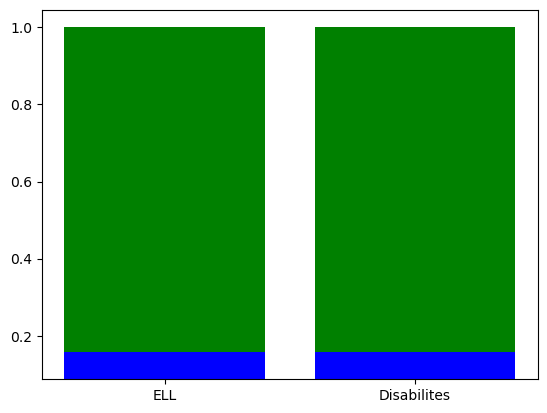

In [24]:
x = ["ELL", "Disabilites"]
y1 = merged_1_df["Percentage ELL"]
y2 = merged_1_df["Percentage Not ELL"]
y3 = merged_1_df["Percentage Disabilities"]
y4 = merged_1_df["Percentage Not Disabilites"]

#Plot
plt.bar(x, y2, bottom=y1, color="b")
plt.bar(x, y4, bottom = y3, color = "g")

plt.show()